In [1]:
import deorbit
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Runs in about 70s
sim = deorbit.simulator.run(
    "adams_bashforth",
    "coesa_atmos_fast",
    initial_state=np.array((deorbit.constants.EARTH_RADIUS + 150000, 0, 0, 7820)),
    time_step=0.1,
    noise_types = {"gaussian": {"noise_strength": 0.001}, "impulse": {"impulse_strength": 0.01, "impulse_probability": 1e-5}},
)

print(type(sim))

Running simulation with Two-step Adams-Bashforth integrator with {'gaussian': GaussianNoiseKwargs(noise_strength=0.001), 'impulse': ImpulseNoiseKwargs(impulse_strength=0.01, impulse_probability=1e-05)} noise
Ran 243602 iterations at time step of 0.1 seconds
Impacted at [-5280364.39067281 -3564742.83965443] at velocity [41.17569805 27.79752447] at simulated time 24360.299999926003s.
Simulation finished in 12.28423 seconds
initial_state=[6521000.0, 0.0, 0.0, 7820.0] initial_time=0.0 simulation_method_kwargs=AdamsBashforthKwargs(dimension=2, time_step=0.1, noise_types={'gaussian': GaussianNoiseKwargs(noise_strength=0.001), 'impulse': ImpulseNoiseKwargs(impulse_strength=0.01, impulse_probability=1e-05)}) atmosphere_model_kwargs=CoesaFastKwargs(earth_radius=6371000, precision=2)
<class 'deorbit.simulator.simulator.AdamsBashforthSimulator'>


In [3]:
save_path = sim.save_data("eg/", format="pkl")

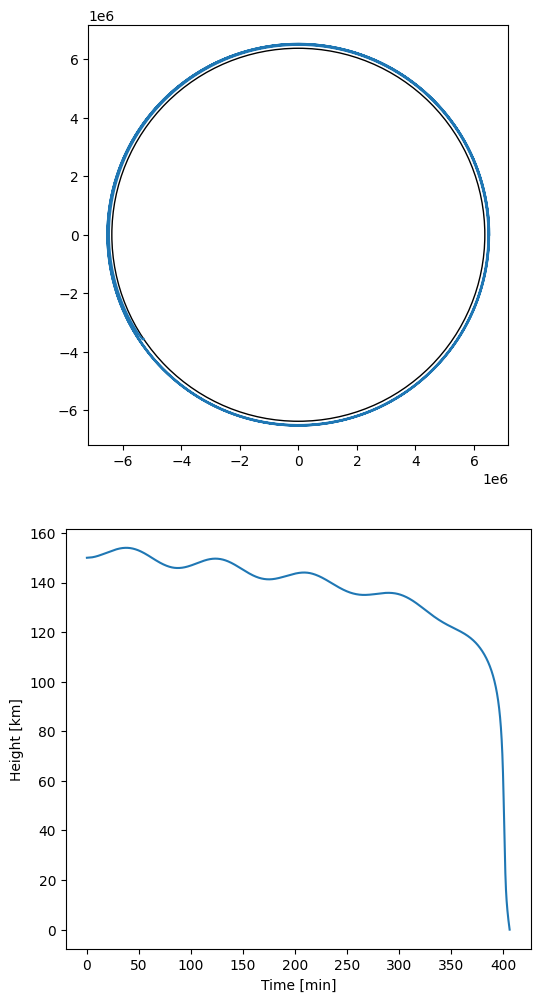

In [4]:
fig, ax = plt.subplots(2,1)
fig.set_figheight(12)
fig.set_figwidth(6)
states = np.array(sim.states)
ax[0].plot(states[:, 0], states[:, 1])
earth = plt.Circle((0, 0), radius=deorbit.constants.EARTH_RADIUS, fill=False)
ax[0].add_patch(earth)
ax[0].axis("scaled")
ax[1].plot(np.array(sim.times) / 60, (np.linalg.norm(states[:, :2], axis=1) - deorbit.constants.EARTH_RADIUS)/1000)
ax[1].set_ylabel("Height [km]")
ax[1].set_xlabel("Time [min]")
plt.show()

In [5]:
sim2 = deorbit.simulator.run(
    "adams_bashforth",
    "coesa_atmos_fast",
    initial_state=np.array((deorbit.constants.EARTH_RADIUS + 150000, 0, 0, 7820)),
    time_step=0.1,
    noise_strength=3.0,
    noise_type = "Impulse"
)

print(type(sim2))

TypeError: run() got an unexpected keyword argument 'noise_strength'

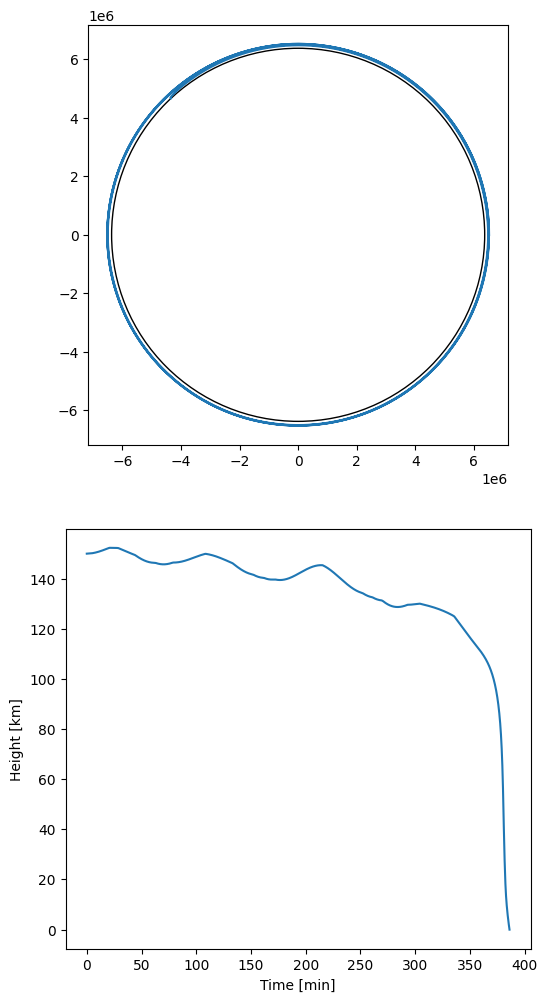

In [ ]:
fig, ax = plt.subplots(2,1)
fig.set_figheight(12)
fig.set_figwidth(6)
states = np.array(sim2.states)
ax[0].plot(states[:, 0], states[:, 1])
earth = plt.Circle((0, 0), radius=deorbit.constants.EARTH_RADIUS, fill=False)
ax[0].add_patch(earth)
ax[0].axis("scaled")
ax[1].plot(np.array(sim2.times) / 60, (np.linalg.norm(states[:, :2], axis=1) - deorbit.constants.EARTH_RADIUS)/1000)
ax[1].set_ylabel("Height [km]")
ax[1].set_xlabel("Time [min]")
plt.show()